In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
greendata = []
for i in range(1,10):
    x = 'green/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x))
        greendata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'green/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        greendata.append(cv2.imread(x))
    except:
         pass
greendata = np.array(greendata)
reddata = []
for i in range(1,10):
    x = 'red/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x))
        reddata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'red/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        reddata.append(cv2.imread(x))
    except:
         pass
reddata = np.array(reddata)
print(reddata.shape)
print(greendata.shape)

(79, 100, 100, 3)
(82, 100, 100, 3)


In [2]:
import numpy as np
def same_shuffle(arr1,arr2):
#     assert arr1.size == arr2.size
    size = arr2.size
    print(size)
    idxs = np.arange(size)
    np.random.shuffle(idxs)
    return arr1[idxs], arr2[idxs]

In [3]:
greenlist = list(greendata)
redlist = list(reddata)
datalist = greenlist + redlist
data = np.array(datalist)

In [4]:
y_green = np.zeros(82)
y_red = np.zeros(79)+1
y_green_list = list(y_green)
y_red_list = list(y_red)
y_list = y_green_list + y_red_list
y = np.array(y_list)
data, y = same_shuffle(data, y)

161


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [6]:
# Change these values
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [7]:
history = model.fit(data, y, epochs=50)

Train on 161 samples
Epoch 1/50
161/161 [==============================] - 1s 9ms/sample - loss: 239.4242 - accuracy: 0.4720
Epoch 2/50
161/161 [==============================] - 1s 5ms/sample - loss: 3.4041 - accuracy: 0.4720
Epoch 3/50
161/161 [==============================] - 1s 5ms/sample - loss: 0.7953 - accuracy: 0.5839
Epoch 4/50
161/161 [==============================] - 1s 5ms/sample - loss: 0.6591 - accuracy: 0.5839
Epoch 5/50
161/161 [==============================] - 1s 5ms/sample - loss: 0.5794 - accuracy: 0.7764
Epoch 6/50
161/161 [==============================] - 1s 5ms/sample - loss: 0.4335 - accuracy: 0.8447
Epoch 7/50
161/161 [==============================] - 1s 5ms/sample - loss: 0.3917 - accuracy: 0.8385
Epoch 8/50
161/161 [==============================] - 1s 5ms/sample - loss: 0.2627 - accuracy: 0.9006
Epoch 9/50
161/161 [==============================] - 1s 5ms/sample - loss: 0.1580 - accuracy: 0.9752
Epoch 10/50
161/161 [==============================] - 1s 6

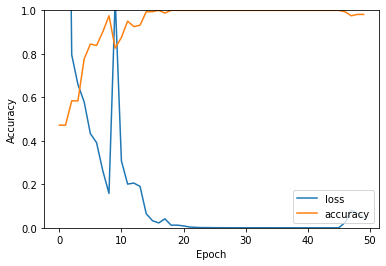

In [8]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [9]:
print(model.predict(tf.cast(np.array([data[0],data[6]]),tf.float32)))
print(y[0],y[6])

[[3.9409316e-04 9.9960595e-01]
 [3.4162454e-08 1.0000000e+00]]
1.0 1.0


In [ ]:
x = np.arange(100).reshape(10,10)

In [ ]:
import tensorflow.lite as tflite

In [11]:
model.save('nn.h5')

In [12]:
model2 = tf.keras.models.load_model('nn.h5')

In [13]:
print(model2.predict(tf.cast(np.array([data[0],data[6]]),tf.float32)))
print(y[0],y[6])

[[3.9409316e-04 9.9960595e-01]
 [3.4162454e-08 1.0000000e+00]]
1.0 1.0
